In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Problem Statement

## Data Gathering

In [2]:
cell_df1= pd.read_csv(r'C:\Users\SAI\Documents\kaggle datasets\Linear datasets\cellphone.csv')
cell_df1

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.20,424,8,1.350,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.70,312,4,1.200,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.00,233,2,1.300,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1206,3551,4638,178.0,5.46,538,4,1.875,128.0,6.000,12.00,16.0,4080,8.4
157,1296,3211,8016,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9
158,856,3260,8809,150.0,5.50,401,8,2.200,64.0,4.000,20.00,20.0,3000,6.8
159,1296,3211,8946,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9


In [3]:
cell_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


## EDA

In [4]:
cell_df1.isna().sum()

Product_id      0
Price           0
Sale            0
weight          0
resoloution     0
ppi             0
cpu core        0
cpu freq        0
internal mem    0
ram             0
RearCam         0
Front_Cam       0
battery         0
thickness       0
dtype: int64

## Feature Selection

In [5]:
cell_df1.corr()['Price']

Product_id      0.165136
Price           1.000000
Sale            0.273263
weight          0.144555
resoloution     0.404010
ppi             0.817614
cpu core        0.686811
cpu freq        0.727383
internal mem    0.776738
ram             0.896915
RearCam         0.739538
Front_Cam       0.675286
battery         0.559946
thickness      -0.716773
Name: Price, dtype: float64

In [6]:
cell_df1 = cell_df1.drop(['Sale','resoloution','cpu core','cpu freq','ppi'],axis=1)

In [7]:
cell_df1=cell_df1.rename({'internal mem':'internal_mem'},axis=1)

In [8]:
cell_df1.corr()['Price']

Product_id      0.165136
Price           1.000000
weight          0.144555
internal_mem    0.776738
ram             0.896915
RearCam         0.739538
Front_Cam       0.675286
battery         0.559946
thickness      -0.716773
Name: Price, dtype: float64

<AxesSubplot:>

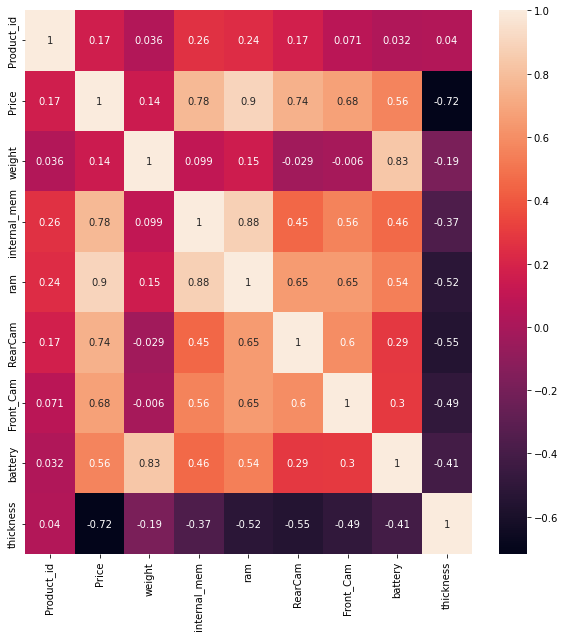

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(cell_df1.corr(),annot=True)

## Model Build

In [10]:
x = cell_df1.drop('Price',axis=1)
y= cell_df1['Price']

## Splitting Data

In [11]:
x_train , x_test , y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)

## Instantiating Model

In [12]:
model = LinearRegression()
model.fit(x_train,y_train)


LinearRegression()

## Model Evaluation

In [13]:
y_pred_test = model.predict(x_test)
y_pred_test

array([1981.24426712, 1229.37554582, 2355.19338577, 1282.5138025 ,
       2078.2988158 , 2567.86721095, 2276.94837349,  289.27234732,
       2058.95964073, 1958.76374559, 3008.58680398, 2852.90784999,
       1958.76374559, 1404.29855262, 2942.75998645, 1469.20824374,
       2196.3487667 , 1979.11341925, 2592.75942704, 2062.4377982 ,
       2450.15110481, 2758.24187357, 2315.01900585, 1469.20824374,
       1719.35548357, 3614.83256104, 2660.04770285, 1351.1290221 ,
       1645.06991464, 2139.88860758, 2453.88190144, 3017.17302135,
       1393.41449119])

In [14]:
y_pred_train = model.predict(x_train)
y_pred_train

array([2838.57902864, 1879.74898354, 2465.59531658, 1351.1290221 ,
       2433.03130394, 2251.85697888, 1599.67033182, 4095.98738383,
       2776.84172878, 1566.91654657, 2574.20279775, 2535.91040606,
       1879.74898354, 3148.93492678, 1770.47989796, 3328.59944325,
       1719.35548357, 1968.82051379, 2539.25216865, 2738.87399905,
       1979.11341925, 1393.41449119, 1528.91018025,  289.27234732,
       2984.42475487, 3322.41328228, 2122.573843  , 2333.74794126,
       1573.13485925, 2592.75942704, 1952.23683054,  895.52714638,
       2719.82921571, 1444.37806817, 1968.82051379, 1528.91018025,
        969.53245198, 2665.14332084, 1556.65815703, 1952.23683054,
       3611.2142717 , 2542.35582926, 2453.88190144, 2308.21794243,
       1920.88259916, 1797.54668975, 2122.573843  , 3008.58680398,
        916.41503001, 1599.67033182, 1765.82546763, 1558.44622435,
       2847.62925267, 3328.59944325, 1282.5138025 , 3558.5511001 ,
        916.41503001, 1765.82546763, 2433.03130394, 2660.04770

## Model Evaluation

In [15]:
print('Evaluation on Test Data')
print()
mse = mean_squared_error(y_test,y_pred_test)
print('Mean_squared_error:',mse)

print()
mae = mean_absolute_error(y_test,y_pred_test)
print('Mean_absolute_error:',mae)
print()
r2_value = r2_score(y_test,y_pred_test)
print('r_score:',r2_value)

print('*'*70)

print('Evaluation on Training Data')
print()
mse = mean_squared_error(y_train,y_pred_train)
print('Mean_squared_error:',mse)

print()
mae = mean_absolute_error(y_train,y_pred_train)
print('Mean_absolute_error:',mae)
print()
r2_value = r2_score(y_train,y_pred_train)
print('r_score:',r2_value)

Evaluation on Test Data

Mean_squared_error: 52834.35298930905

Mean_absolute_error: 184.53047933267527

r_score: 0.8708702322951165
**********************************************************************
Evaluation on Training Data

Mean_squared_error: 41559.65610179037

Mean_absolute_error: 164.397130819139

r_score: 0.9341882349104138


## Testing of Model on Single Row

In [16]:
x.head(1).T

,0
Product_id,203.0
weight,135.0
internal_mem,16.0
ram,3.0
RearCam,13.0
Front_Cam,8.0
battery,2610.0
thickness,7.4


In [17]:
Product_id = 203.0
weight = 135.0
internal_mem = 16.0
ram = 3.0
RearCam = 13.0
Front_Cam = 8.0
battery = 2610.0
thickness = 7.4

test_array = np.array([Product_id,weight,internal_mem,ram,RearCam,Front_Cam,battery,thickness],ndmin=2)
test_array

price = np.around(model.predict(test_array)[0],2)
price

C:\Users\SAI\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


2539.25

In [28]:
test_array = np.zeros(8)
test_array[0] = Product_id
test_array[1] = weight
test_array[2] = internal_mem
test_array[3] = ram
test_array[4] = RearCam
test_array[5] = Front_Cam
test_array[6] = battery
test_array[7] = thickness


predicted_price = np.around(model.predict([test_array])[0],2)
predicted_price

C:\Users\SAI\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


2539.25

## Save Model

In [29]:
import pickle

In [30]:
with open('cellphone_price_predictor.pkl','wb') as file:
    pickle.dump(model,file)

In [31]:
import json

In [33]:
project_data = {'columns':list(x.columns)}
project_data

{'columns': ['Product_id',
  'weight',
  'internal_mem',
  'ram',
  'RearCam',
  'Front_Cam',
  'battery',
  'thickness']}

In [34]:
with open ('project_data.json','w') as file:
    json.dump(project_data,file)

## Model Training